In [1]:
import numpy as np 
import pandas as pd 
import shutil
import sys
import os

In [2]:
# from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.preprocessing import image
from keras.applications import VGG16
from keras.optimizers import Adam
import keras.backend as K
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy

%matplotlib inline

Using TensorFlow backend.


# Visualise the Picture of Eye

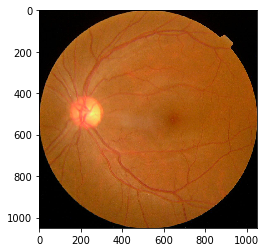

In [3]:
PATH = "/home/curiousgirl/Desktop/blindless_detection/blindness_problem/APTOS-Blindness-Detection-Kaggle/train_split0/0e0003ddd8df.png"
for i in range(0,1):
    p = PATH.format(i)
    image = mpimg.imread(p) # images are color images
    plt.imshow(image)

#### Rescaling the image and generating it using ImageDataGenerator function 


In [4]:
train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.1, horizontal_flip= True)
valid_datagen= ImageDataGenerator(rescale=1./255)
size=(128,128)          #reshape the image in  (128,128)
in_shape=(128,128,3)   #input shape of image is  (128,128,3)
train_set= train_datagen.flow_from_directory('/home/curiousgirl/Desktop/blindless_detection/blindness_problem/APTOS-Blindness-Detection-Kaggle/aptos2019-blindness-detection/train', 
                                             target_size=size, batch_size=50, class_mode='categorical', 
                                             shuffle=True, seed=20)
valid_set= valid_datagen.flow_from_directory('/home/curiousgirl/Desktop/blindless_detection/blindness_problem/APTOS-Blindness-Detection-Kaggle/aptos2019-blindness-detection/final_data/val', 
                                             target_size=size, batch_size=50, class_mode='categorical', 
                                             shuffle=False)

Found 3662 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [5]:
#using pre-trained model VGG16
base_model=VGG16(input_shape=in_shape, weights='imagenet', include_top=False)

### Adding dense layers on top of VGG16 layer architecture

In [6]:
x=base_model.output
x=Conv2D(32, (3,3), activation='relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
# x=Dense(units=64, activation='relu')(x)
x=Dense(units=32, activation='relu')(x)
x=Dense(units=8, activation='relu')(x)
x=Dense(units=5, activation='softmax')(x)

In [7]:
model=Model(inputs=base_model.inputs, outputs=x)
for layer in model.layers[:16]:
  layer.trainable=False

for layer in model.layers[16:]:
    layer.trainable=True

### Compile and fitting the model

In [ ]:
#Compile and fit the datasets
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
step_size_train=train_set.n//train_set.batch_size
step_size_valid=valid_set.n//valid_set.batch_size
model.fit_generator(train_set, steps_per_epoch=step_size_train, epochs=10, 
                    validation_data= valid_set, validation_steps=step_size_valid)
#Save model
model.save('save_vgg16_model.h5')

Epoch 1/10
 4/73 [>.............................] - ETA: 30:33 - loss: 3.1116 - accuracy: 0.4050

/home/curiousgirl/anaconda3/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


72/73 [============================>.] - ETA: 16s - loss: 1.1611 - accuracy: 0.5949

/home/curiousgirl/anaconda3/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


73/73 [==============================] - 7419s 102s/step - loss: 1.1566 - accuracy: 0.5966 - val_loss: 1.9643 - val_accuracy: 0.6971
Epoch 2/10
73/73 [==============================] - 1105s 15s/step - loss: 0.8550 - accuracy: 0.6988 - val_loss: 0.9235 - val_accuracy: 0.7675
Epoch 3/10
73/73 [==============================] - 1096s 15s/step - loss: 0.8291 - accuracy: 0.7043 - val_loss: 0.9912 - val_accuracy: 0.6720
Epoch 4/10
73/73 [==============================] - 1045s 14s/step - loss: 0.7958 - accuracy: 0.7107 - val_loss: 0.7470 - val_accuracy: 0.7197
Epoch 5/10
73/73 [==============================] - 1032s 14s/step - loss: 0.7842 - accuracy: 0.7121 - val_loss: 0.1762 - val_accuracy: 0.7197
Epoch 6/10
59/73 [=======================>......] - ETA: 6:18 - loss: 0.7558 - accuracy: 0.7149

/home/curiousgirl/anaconda3/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 56 could not be retrieved. It could be because a worker has died.
  UserWarning)


73/73 [==============================] - 2306s 32s/step - loss: 0.7578 - accuracy: 0.7184 - val_loss: 0.2270 - val_accuracy: 0.6720
Epoch 7/10
73/73 [==============================] - 2952s 40s/step - loss: 0.7588 - accuracy: 0.7179 - val_loss: 0.1440 - val_accuracy: 0.6624
Epoch 8/10
73/73 [==============================] - 1380s 19s/step - loss: 0.7203 - accuracy: 0.7265 - val_loss: 1.9663 - val_accuracy: 0.6624
Epoch 9/10
73/73 [==============================] - 1200s 16s/step - loss: 0.7299 - accuracy: 0.7270 - val_loss: 1.7893 - val_accuracy: 0.7457
Epoch 10/10
10/73 [===>..........................] - ETA: 15:53 - loss: 0.7719 - accuracy: 0.6980

### Saved the model after training

In [ ]:
from keras.models import load_model
model=load_model('save_vgg16_model.h5')

In [ ]:
import os
label=os.listdir('/home/curiousgirl/Desktop/blindless_detection/blindness_problem/APTOS-Blindness-Detection-Kaggle/aptos2019-blindness-detection/final_data/test')
pred1=np.array([])
conf=np.array([])
true=np.array([])

In [ ]:
y=pd.read_csv('aptos2019-blindness-detection/test.csv')

In [ ]:
y.head()

### Making Predictions

In [ ]:
for i in y['id_code']:
  img=image.load_img(('/home/curiousgirl/Desktop/blindless_detection/blindness_problem/APTOS-Blindness-Detection-Kaggle/aptos2019-blindness-detection/test_images/'+i+".png"),target_size=size)
  img=image.img_to_array(img)
  img=img.reshape(1,128,128,3)
  output=model.predict(img)
  pred1=np.append(pred1,(np.argmax(output[0]))) 

In [ ]:
pred = []
for j in pred1:
  pred.append(int(j))
print(pred,'\nLength of prediction :  ',len(pred))

In [ ]:
submission = pd.DataFrame({'id_code':y['id_code'],'diagnosis': pred })

In [1]:
submission.to_csv('submission.csv', index=False)

NameError: name 'submission' is not defined

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()